In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [24]:
df = pd.read_csv("cleaned-data/combined_happiness_data.csv")   
print("Data Shape:", df.shape)
print(df.head())

Data Shape: (777, 10)
   index      Country         Region  Happiness Rank  \
0    153  Afghanistan  Southern Asia             154   
1    152  Afghanistan  Southern Asia             153   
2    144  Afghanistan            NaN             145   
3    153  Afghanistan            NaN             154   
4    140  Afghanistan            NaN             141   

   Economy (GDP per Capita)    Family  Health (Life Expectancy)  Freedom  \
0                  0.382270  0.110370                  0.173440  0.16430   
1                  0.319820  0.302850                  0.303350  0.23414   
2                  0.332000  0.537000                  0.255000  0.08500   
3                  0.350000  0.517000                  0.361000  0.00000   
4                  0.401477  0.581543                  0.180747  0.10618   

   Trust (Government Corruption)  Generosity  
0                       0.071120    0.312680  
1                       0.097190    0.365100  
2                       0.036000    0.19100

In [25]:
df.drop(["index", "Country", "Region"], axis=1, inplace=True, errors="ignore")

In [26]:
df.isnull().sum()

Happiness Rank                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64

In [27]:
df.dtypes

Happiness Rank                     int64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

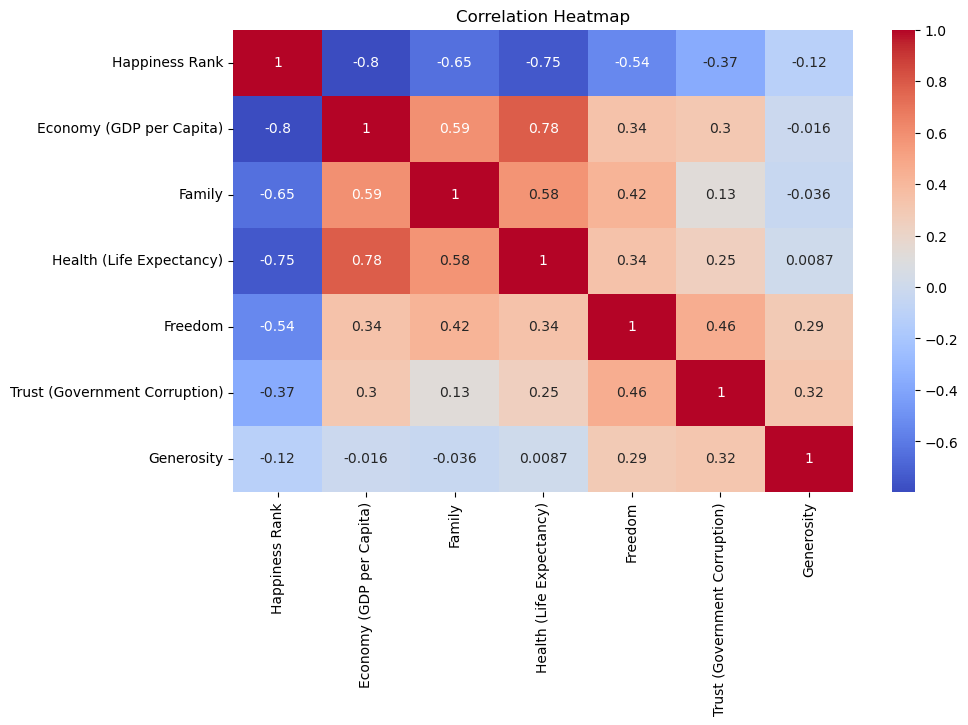

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [29]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


In [30]:
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

In [35]:
# Sort by happiness rank
df.sort_values(by='Happiness Rank', ascending=True, inplace=True)
df

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
223,1,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000
220,1,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000
665,1,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780
188,1,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710
520,1,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
...,...,...,...,...,...,...,...
670,156,0.663200,0.474890,0.721930,0.156840,0.189060,0.471790
111,156,0.091000,0.627000,0.145000,0.065000,0.076000,0.149000
110,157,0.015300,0.415870,0.223960,0.118500,0.100620,0.197270
109,157,0.068310,0.234420,0.157470,0.043200,0.094190,0.202900


In [32]:
print(df.columns)


Index(['Happiness Rank', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')


In [33]:
scaler = StandardScaler()
X = df.drop("Happiness Rank", axis=1)  
y = df["Happiness Rank"]                

X_scaled = scaler.fit_transform(X)